$\text{Ka Hang Wong(Hannah) 47719646 DSCI Project Individual Project}$

$\text{Question 1: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.}$

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
options(repr.matrix.max.rows=6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players<-read_csv("Data/players.csv")
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


$\text{Data Description}$: 
About players.csv, it contains 196 rows and 9 columns, which means we have 196 results and nine variables to look at. 

1. experience <- shows the proficiency of the minecraft player. Levels of "Pro", "Veteran", "Regular", and "Amateur" will be used to describe person's experience on playing minecraft. 
2. subscibe <- shows if the person subscribed to PlaiCraft's email updates
3. played_hours <- shows how long did the player play in the PlaiCraft server
4. gender <- the gender of players. Includes "Female", "Male", "Non-Binary", "Two-Spirited", "Prefer not to say", etc.
5. age <- the age of players.
6. hashedemail <- the email of the person.
7. name <- the provided name for the person to play in Minecraft

8. individualld <- Individual ID for each person
9. organizationName <- organization that host the project

*Potential Issue that related to things that I cannot directly see:*
1. People may provide false information and leading us to have an unaccurate result.

In [20]:
sessions<-read_csv("Data/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


$\text{I decided not to use the session data since the information is based on their playing time slot, which is not important for predicting our question.}$

$\text{(2)}$
My group will be working on question 1, and we will be focusing on which kind of people are willing to play more. The response variable of interest will be experience, subscribe, gender, and age and the explanatory variables will be played_hours. People who played the most hours will contribute a large amount of data, and the explanatory variable will help to understand which kind of players may willing to play longer hours. To apply one of the predictive methods, I will need to select the data.
I selected these five variables:

1. experience
2. subscibe
3. played_hours
4. gender
5. age

I didn't select the other four variables:
1. hashedemail
2. name

These two variables only shows the personal information of the person, which don't really related to our question.

3. individualld
4. organizationName

These two variables don't provide any information.

$\text{(3) Exploratory Data Analysis and Visualization}$

In [4]:
players_tidy<-players|>
select(experience, subscribe, played_hours, gender, age)
players_tidy

experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17
Pro,TRUE,0.2,Other,91


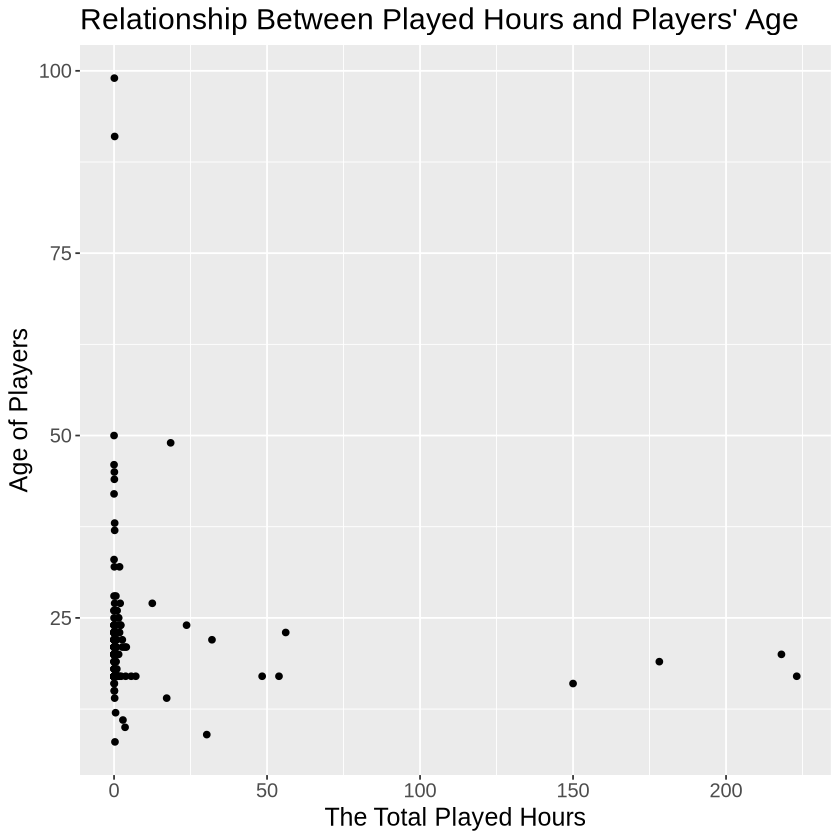

In [15]:
age_plot<-players_tidy|>
ggplot(aes(x=played_hours, y=age))+
geom_point()+
xlab("The Total Played Hours")+
ylab("Age of Players")+
labs(title="Relationship Between Played Hours and Players' Age")+
theme(text = element_text(size = 15))
age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


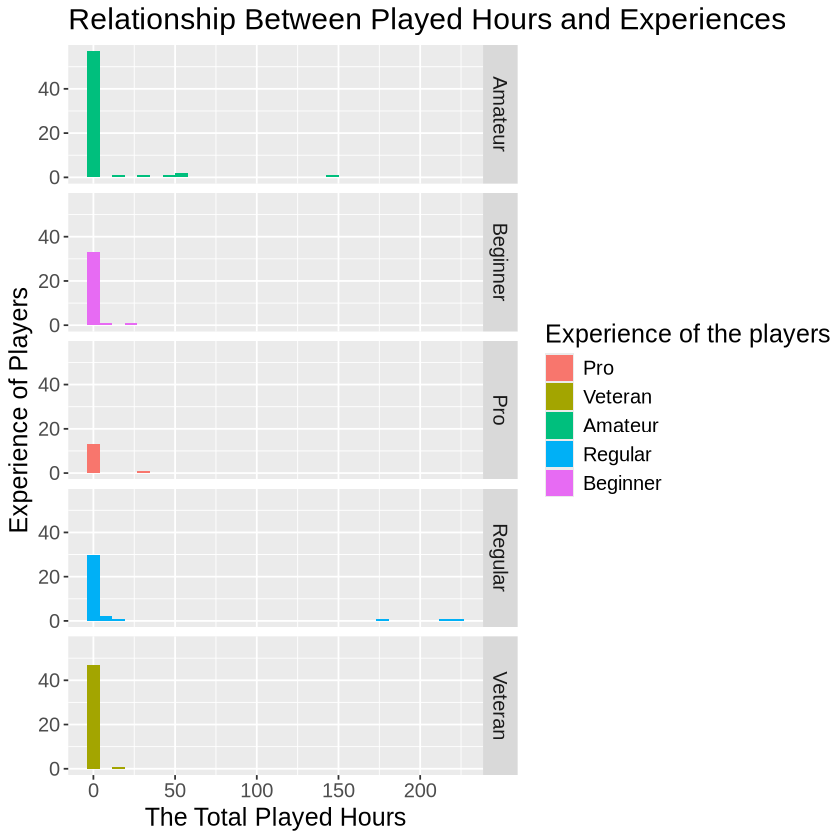

In [17]:
experience_plot<-players_tidy|>
ggplot(aes(x=played_hours, fill=as_factor(experience)))+
geom_histogram()+
facet_grid(rows = vars(experience)) +
xlab("The Total Played Hours")+
ylab("Experience of Players")+
labs(title="Relationship Between Played Hours and Experiences", fill="Experience of the players")+
theme(text = element_text(size = 15))
experience_plot


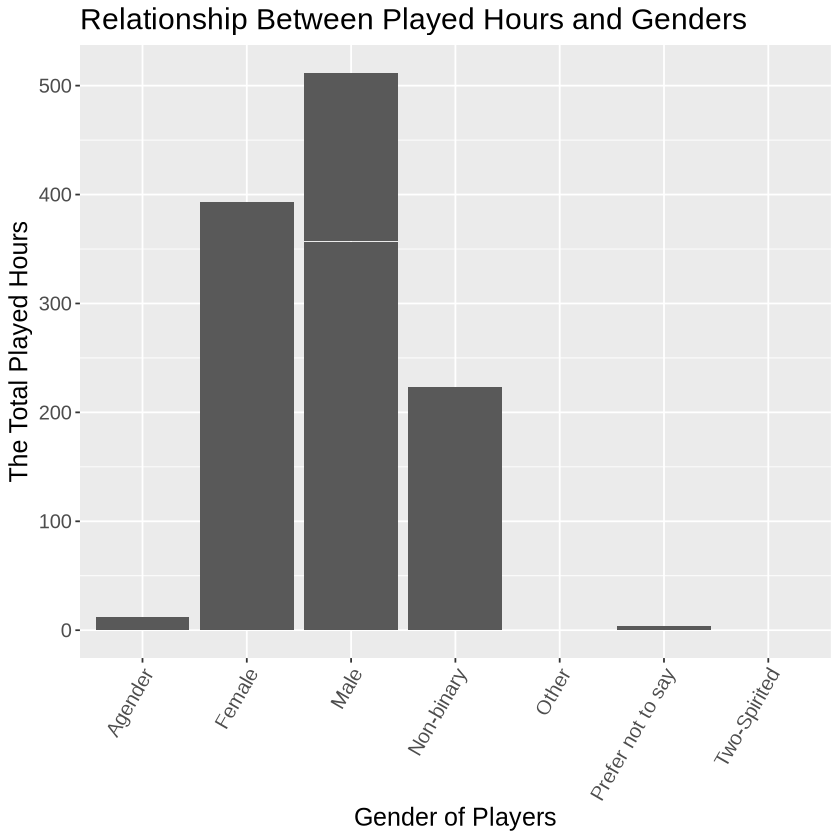

In [13]:
gender_plot<-players_tidy|>
ggplot(aes(y=played_hours, x=gender))+
geom_bar(stat="identity")+
xlab("Gender of Players")+
ylab("The Total Played Hours")+
labs(title="Relationship Between Played Hours and Genders")+
theme(text = element_text(size = 15))+
theme(axis.text.x = element_text(angle = 60, hjust = 1))
gender_plot

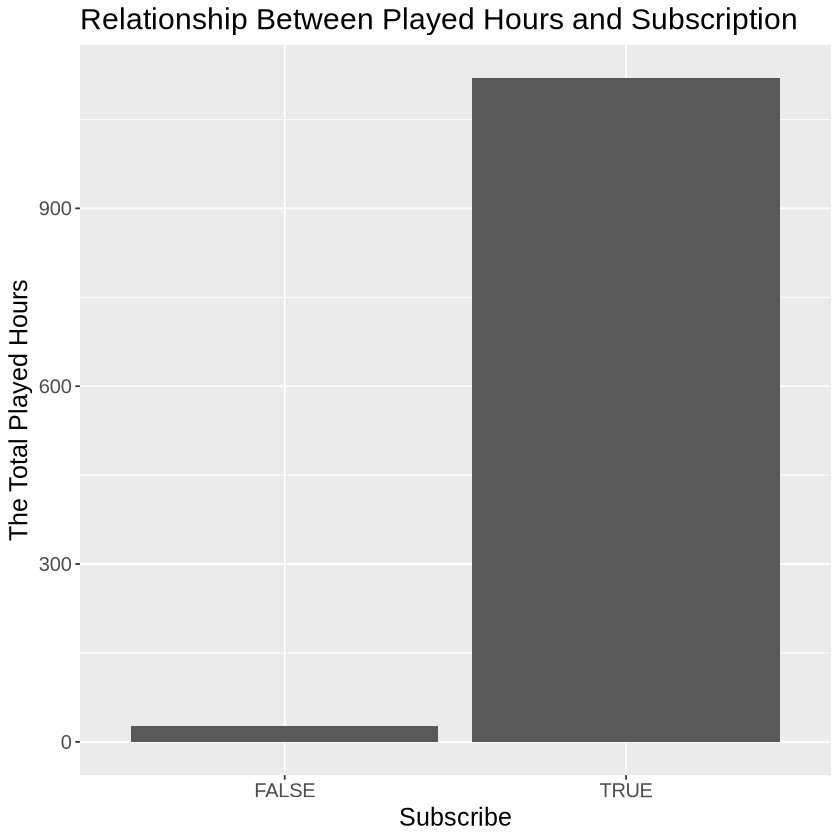

In [12]:
subscribe_plot<-players_tidy|>
ggplot(aes(y=played_hours, x=subscribe))+
geom_bar(stat="identity")+
xlab("Subscribe")+
ylab("The Total Played Hours")+
labs(title="Relationship Between Played Hours and Subscription")+
theme(text = element_text(size = 15))
subscribe_plot

$\text{These information provides us an insight on the relationship between played hours and other variables, and making sure that they are connected.}$

$\text{(4)}$
I am planning to do KNN-classification since it is useful for predicting the category of new data points. We will need to use four KNN-classification with the fixed variables played_. We will need to scale our data before using KNN-classification, and since it is sensitive to scale, if we do not scale data correctly, the prediction will be unaccurate. KNN-classification required lots of calculations, such as finding the best K value, and it required a high accuracy. To do KNN-classification, we will first scale the data, then find the best K-neighbor by splitting 75% of the data into training set and 25% into the testing set by using the function initial split. We will also use vfold, which is cross-validation, to search for the best proportions to predict the best K value, then we can start to create our recipes and models to predict the final category. 